In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [3]:
data= pd.read_csv("urldata.csv")

In [48]:
data.shape

(450176, 27)

In [4]:
data.head(100)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
95,95,https://www.google.nl,benign,0
96,96,https://www.pixnet.net,benign,0
97,97,https://www.google.co.th,benign,0
98,98,https://www.google.com.pk,benign,0


In [5]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data.isnull().sum()

Unnamed: 0    0
url           0
label         0
result        0
dtype: int64

In [7]:
data.label.value_counts()

benign       345738
malicious    104438
Name: label, dtype: int64

In [8]:
!pip3 install tld

In [9]:
from urllib.parse import urlparse
from tld import get_tld
import os.path
!pip3 install googlesearch-python

In [10]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
data['use_of_ip'] = data['url'].apply(lambda i: having_ip_address(i))

#pip install googlesearch-python

from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
data['google_index'] = data['url'].apply(lambda i: google_index(i))

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

data['count.'] = data['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

data['count-www'] = data['url'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

data['count@'] = data['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

data['count_dir'] = data['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

data['count_embed_domian'] = data['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
data['short_url'] = data['url'].apply(lambda i: shortening_service(i))

def count_https(url):
    return url.count('https')

data['count-https'] = data['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

data['count-http'] = data['url'].apply(lambda i : count_http(i))

def count_per(url):
    return url.count('%')

data['count%'] = data['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

data['count?'] = data['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

data['count-'] = data['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

data['count='] = data['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
data['url_length'] = data['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

data['hostname_length'] = data['url'].apply(lambda i: hostname_length(i))

data.head(100)

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
data['sus_url'] = data['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


data['count-digits']= data['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

data['count-letters']= data['url'].apply(lambda i: letter_count(i))

# pip install tld

from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data['fd_length'] = data['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
data['tld'] = data['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

data['tld_length'] = data['tld'].apply(lambda i: tld_length(i))

In [11]:
data.head(100)

,Unnamed: 0,url,label,result,use_of_ip,google_index,count.,count-www,count@,count_dir,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,0,https://www.google.com,benign,0,0,1,2,1,0,0,...,0,0,22,14,0,0,17,0,com,3
1,1,https://www.youtube.com,benign,0,0,1,2,1,0,0,...,0,0,23,15,0,0,18,0,com,3
2,2,https://www.facebook.com,benign,0,0,1,2,1,0,0,...,0,0,24,16,0,0,19,0,com,3
3,3,https://www.baidu.com,benign,0,0,1,2,1,0,0,...,0,0,21,13,0,0,16,0,com,3
4,4,https://www.wikipedia.org,benign,0,0,1,2,1,0,0,...,0,0,25,17,0,0,20,0,org,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,https://www.google.nl,benign,0,0,1,2,1,0,0,...,0,0,21,13,0,0,16,0,nl,2
96,96,https://www.pixnet.net,benign,0,0,1,2,1,0,0,...,0,0,22,14,0,0,17,0,net,3
97,97,https://www.google.co.th,benign,0,0,1,3,1,0,0,...,0,0,24,16,0,0,18,0,co.th,5
98,98,https://www.google.com.pk,benign,0,0,1,3,1,0,0,...,0,0,25,17,0,0,19,0,com.pk,6


In [12]:
data.columns

Index(['Unnamed: 0', 'url', 'label', 'result', 'use_of_ip', 'google_index',
       'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domian',
       'short_url', 'count-https', 'count-http', 'count%', 'count?', 'count-',
       'count=', 'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld', 'tld_length'],
      dtype='object')

In [13]:
data.drop('tld',1)
data.drop(['Unnamed: 0','url','result','google_index'], axis=1)

,label,use_of_ip,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,benign,0,2,1,0,0,0,0,1,1,...,0,0,22,14,0,0,17,0,com,3
1,benign,0,2,1,0,0,0,0,1,1,...,0,0,23,15,0,0,18,0,com,3
2,benign,0,2,1,0,0,0,0,1,1,...,0,0,24,16,0,0,19,0,com,3
3,benign,0,2,1,0,0,0,0,1,1,...,0,0,21,13,0,0,16,0,com,3
4,benign,0,2,1,0,0,0,0,1,1,...,0,0,25,17,0,0,20,0,org,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,malicious,0,2,0,0,3,0,1,0,1,...,1,0,43,11,0,0,34,8,com,3
450172,malicious,0,2,0,0,12,0,0,0,1,...,0,1,159,13,0,21,118,2,com,3
450173,malicious,0,1,0,0,12,0,0,0,1,...,0,1,147,13,0,20,109,2,com,3
450174,malicious,0,1,0,0,1,0,0,0,1,...,0,0,22,14,0,0,17,0,com,3


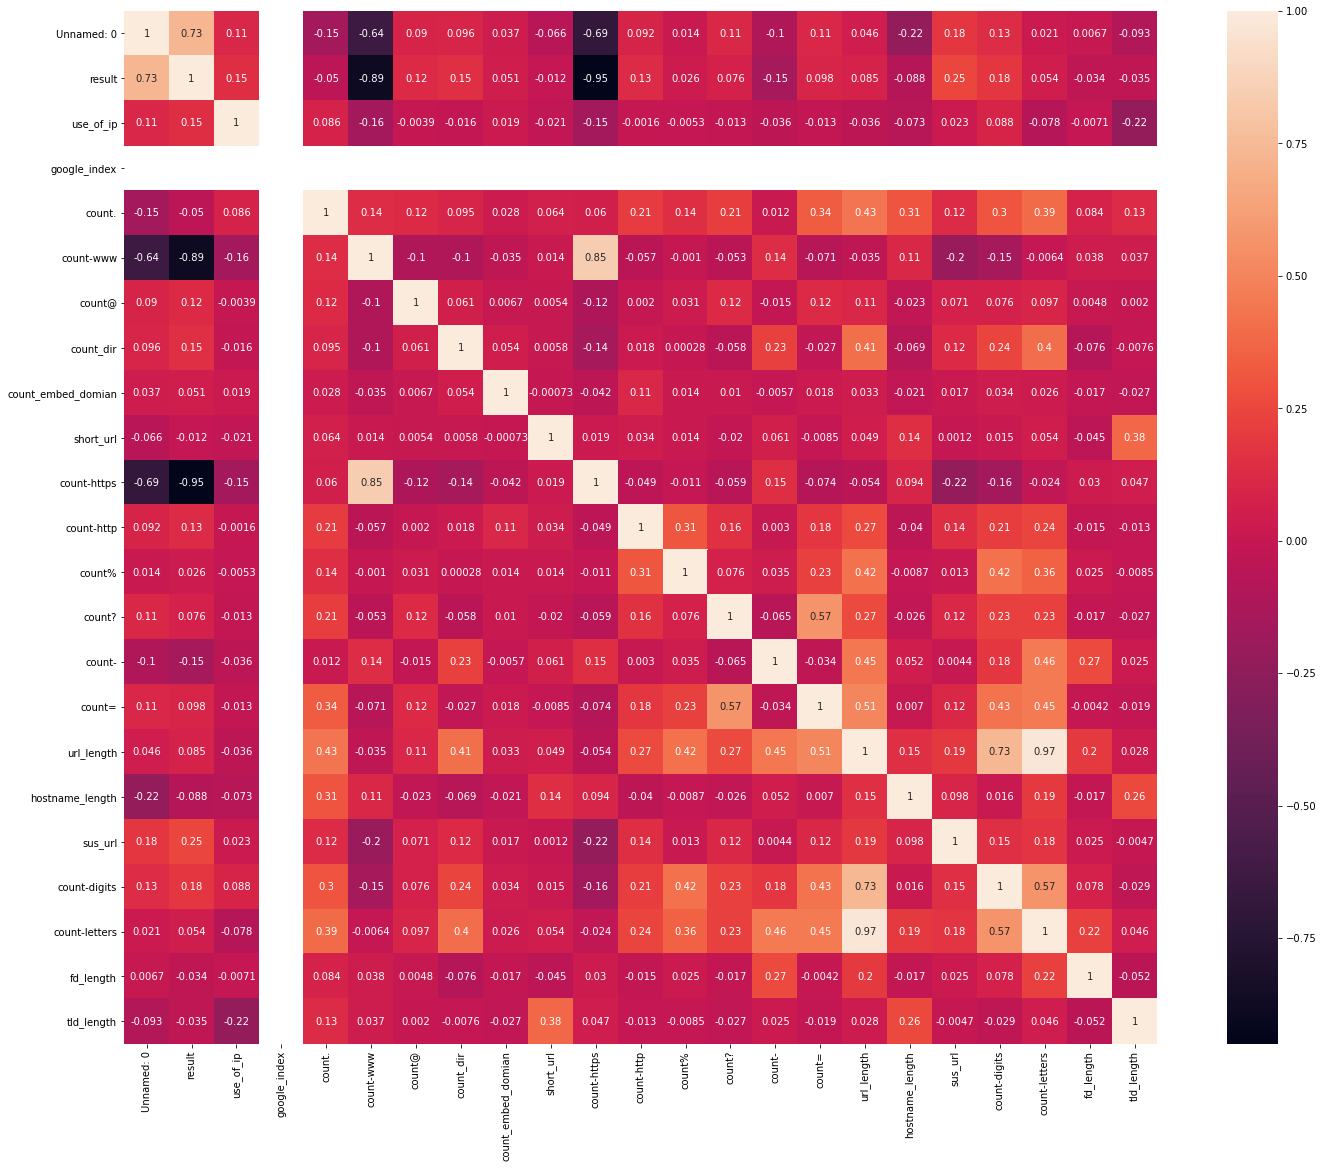

In [14]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

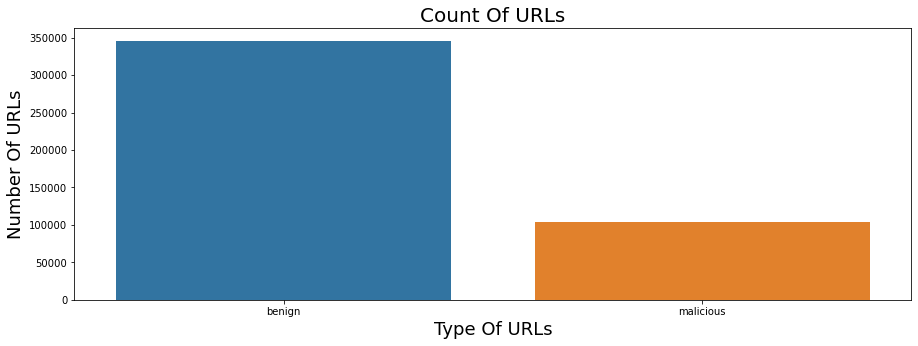

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=data)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [16]:

print("Percent Of Benign URLs:{:.2f} %".format(len(data[data['label']=='benign'])/len(data['label'])*100))
print("Percent Of malware URLs:{:.2f} %".format(len(data[data['label']=='malicious'])/len(data['label'])*100))


Percent Of Benign URLs:76.80 %
Percent Of malware URLs:23.20 %


(0.0, 1000.0)

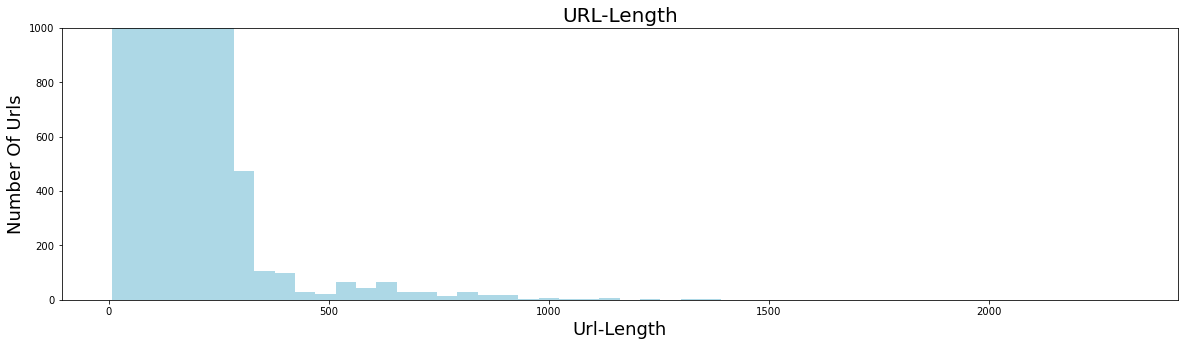

In [17]:
plt.figure(figsize=(20,5))
plt.hist(data['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

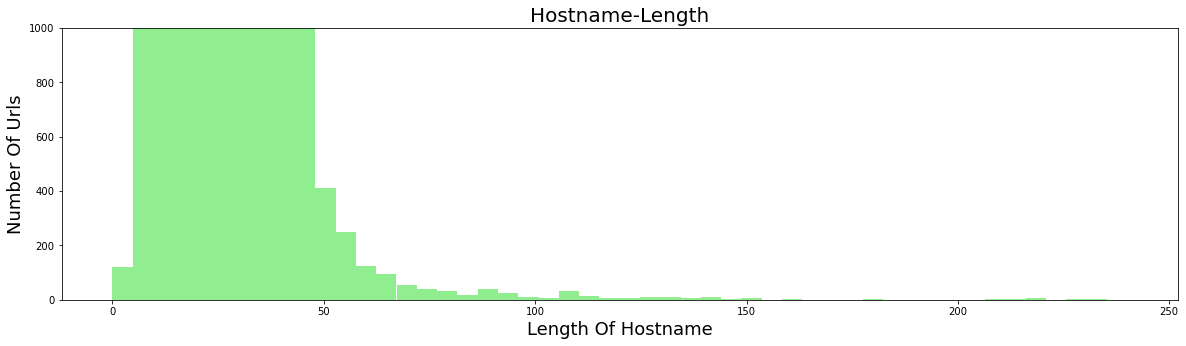

In [18]:
plt.figure(figsize=(20,5))
plt.hist(data['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

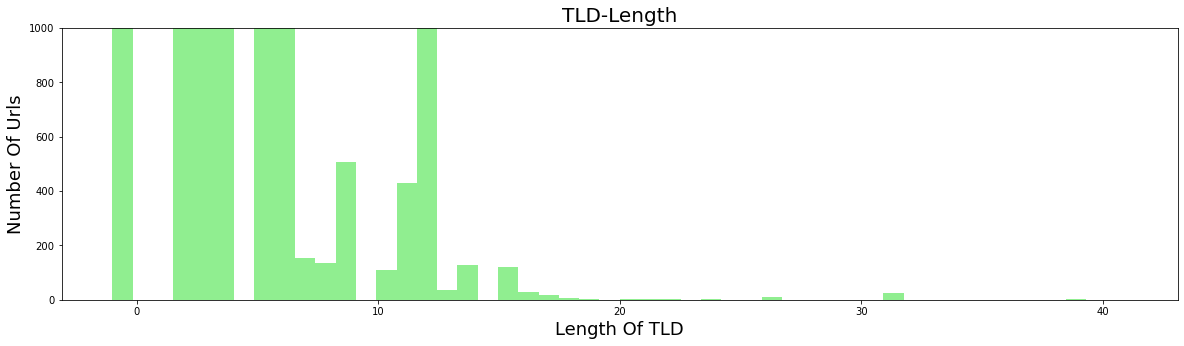

In [19]:
plt.figure(figsize=(20,5))
plt.hist(data['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

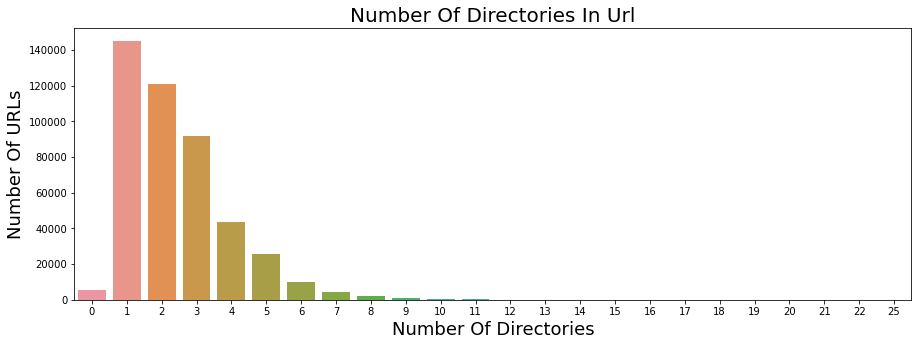

In [20]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=data)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

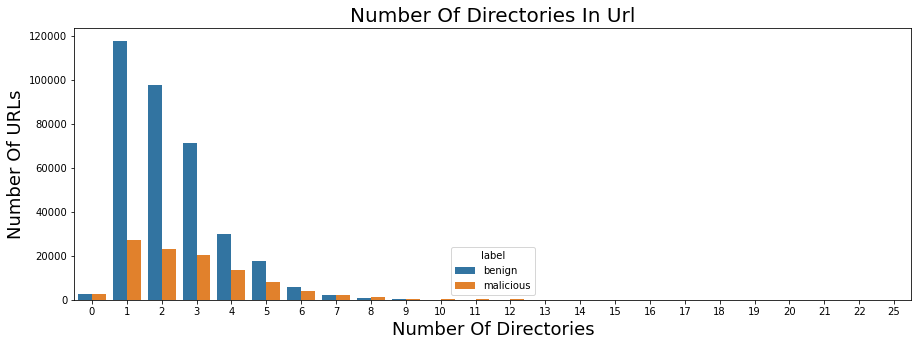

In [21]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=data,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

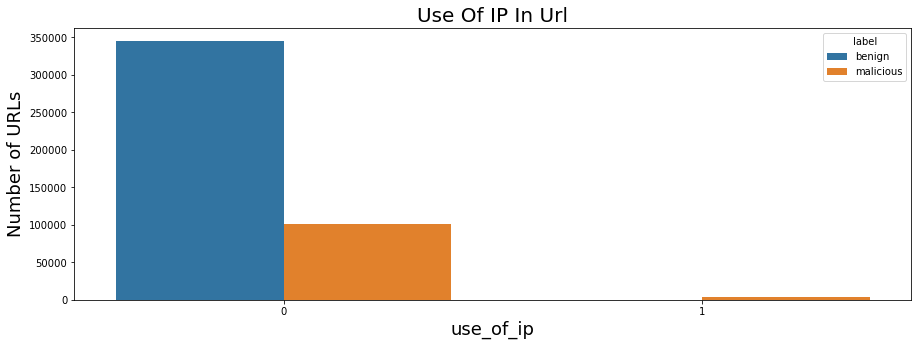

In [22]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(data['use_of_ip'],hue='label',data=data)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

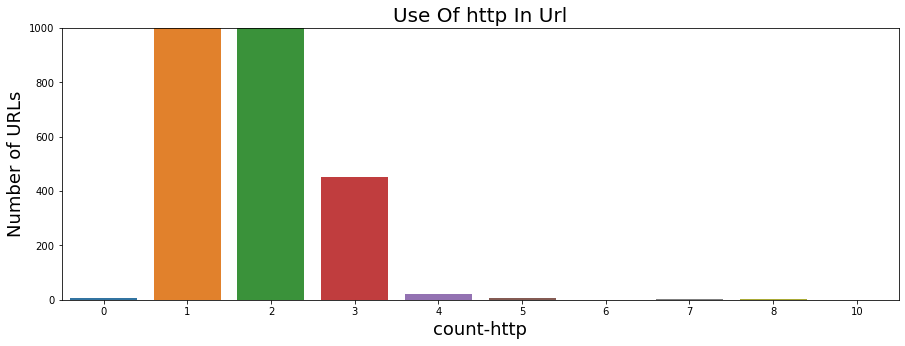

In [23]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(data['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

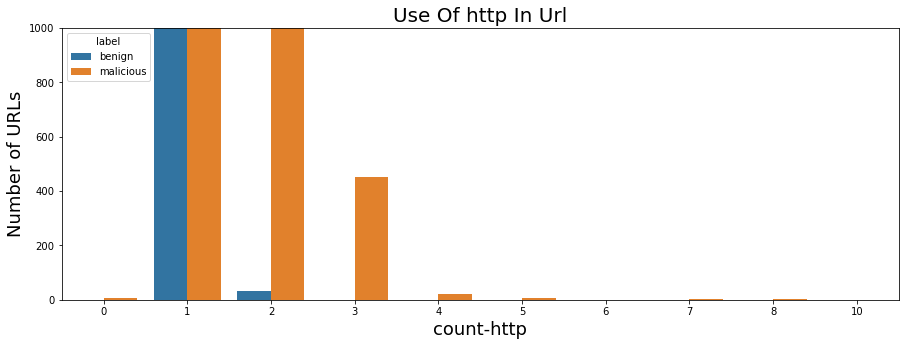

In [24]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(data['count-http'],hue='label',data=data)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

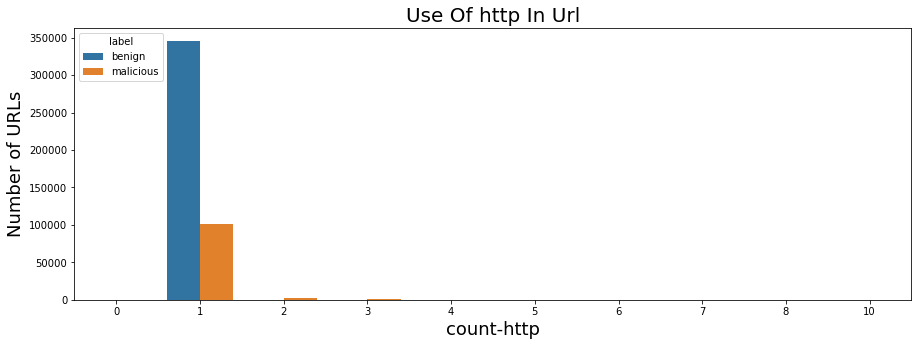

In [25]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(data['count-http'],hue='label',data=data)

plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

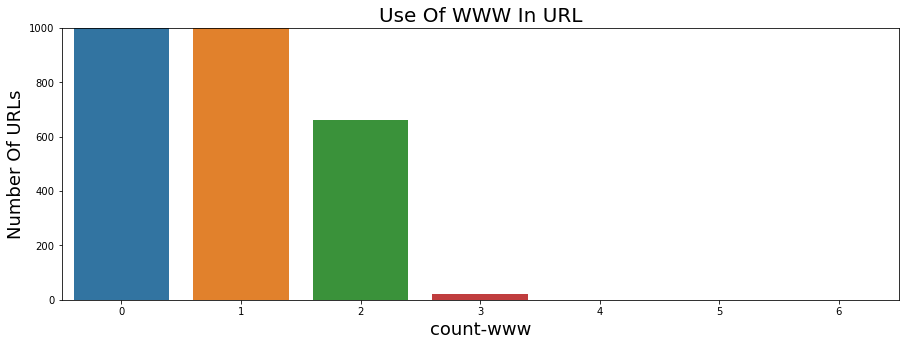

In [26]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(data['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

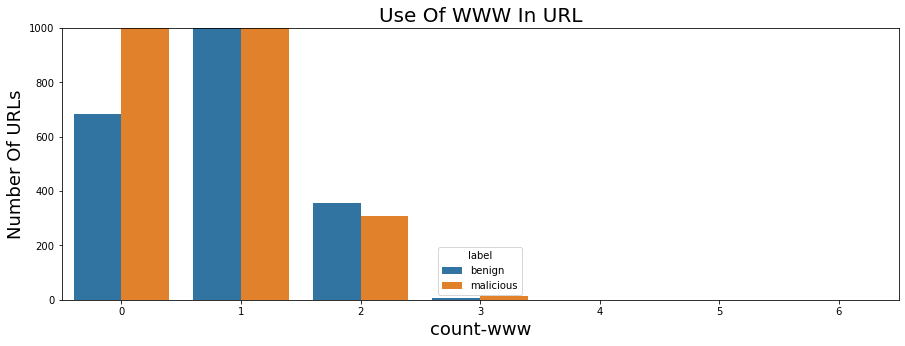

In [27]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(data['count-www'],hue='label',data=data)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [28]:
from sklearn.preprocessing import LabelEncoder 

In [29]:
label_maker=LabelEncoder()

In [30]:
data['type_code']=label_maker.fit_transform(data['label'])
data['label'].value_counts()

benign       345738
malicious    104438
Name: label, dtype: int64

In [31]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = data[['use_of_ip', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = data['type_code']

In [32]:
X.head(100)

,use_of_ip,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,2,1,0,0,0,0,1,1,0,0,0,0,22,14,0,0,3,0,17
1,0,2,1,0,0,0,0,1,1,0,0,0,0,23,15,0,0,3,0,18
2,0,2,1,0,0,0,0,1,1,0,0,0,0,24,16,0,0,3,0,19
3,0,2,1,0,0,0,0,1,1,0,0,0,0,21,13,0,0,3,0,16
4,0,2,1,0,0,0,0,1,1,0,0,0,0,25,17,0,0,3,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,2,1,0,0,0,0,1,1,0,0,0,0,21,13,0,0,2,0,16
96,0,2,1,0,0,0,0,1,1,0,0,0,0,22,14,0,0,3,0,17
97,0,3,1,0,0,0,0,1,1,0,0,0,0,24,16,0,0,5,0,18
98,0,3,1,0,0,0,0,1,1,0,0,0,0,25,17,0,0,6,0,19


In [33]:
X.columns

Index(['use_of_ip', 'count.', 'count-www', 'count@', 'count_dir',
       'count_embed_domian', 'short_url', 'count-https', 'count-http',
       'count%', 'count?', 'count-', 'count=', 'url_length', 'hostname_length',
       'sus_url', 'fd_length', 'tld_length', 'count-digits', 'count-letters'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, shuffle=True, random_state=100) 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

log_predictions = log_model.predict(X_test)
print(classification_report(y_test,log_predictions,target_names=['benign','malicious']))
accuracy=accuracy_score(y_test,log_predictions)
print('accuracy:  %0.3f' % accuracy)

C:\Users\Denebola Biswas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      benign       1.00      1.00      1.00    103722
   malicious       0.99      0.98      0.99     31331

    accuracy                           0.99    135053
   macro avg       0.99      0.99      0.99    135053
weighted avg       0.99      0.99      0.99    135053

accuracy:  0.994


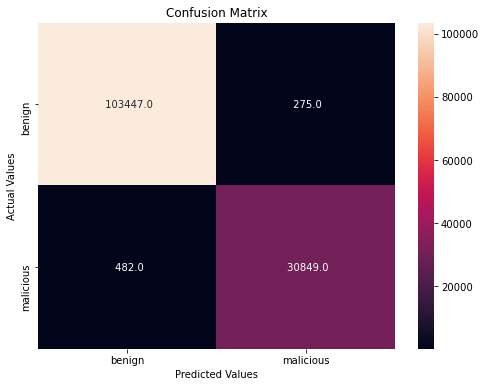

In [37]:
cm=confusion_matrix(y_test,log_predictions)
cm_df=pd.DataFrame(cm, index =['benign','malicious'], columns =['benign','malicious'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot =True,fmt=' .1f')
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [38]:
import xgboost as xgb

In [39]:
xgb_model = xgb.XGBClassifier(n_estimators=100)
xgb_model.fit(X_train,y_train)

xgb_predictions = xgb_model.predict(X_test)
print(classification_report(y_test,xgb_predictions,target_names=['benign','malicious']))
accuracy=accuracy_score(y_test,xgb_predictions)
print('accuracy:  %0.3f' % accuracy)

C:\Users\Denebola Biswas\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00    103722
   malicious       1.00      0.99      0.99     31331

    accuracy                           1.00    135053
   macro avg       1.00      1.00      1.00    135053
weighted avg       1.00      1.00      1.00    135053

accuracy:  0.998


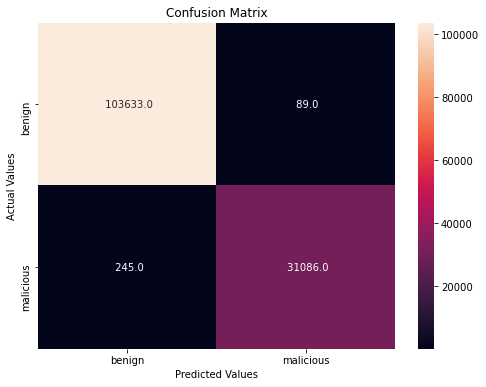

In [40]:
cx=confusion_matrix(y_test,xgb_predictions)
cx_df=pd.DataFrame(cx, index =['benign','malicious'], columns =['benign','malicious'])
plt.figure(figsize=(8,6))
sns.heatmap(cx_df, annot =True,fmt=' .1f')
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

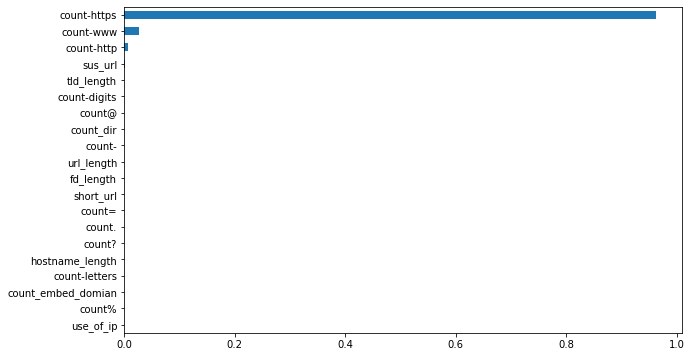

In [41]:
feat_importance=pd.Series(xgb_model.feature_importances_,index=X_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10,6)) 

In [47]:
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    return status

# predict function 
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))
    pred = xgb_model.predict(features_test)
    if int(pred[0]) == 0:
        
        res="BENIGN"
        return res
    elif int(pred[0]) == 1.0:
        
        res="MALICIOUS"
        return res


# predicting sample raw URLs

urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota' ]

for url in urls:
     print(get_prediction_from_url(url))

MALICIOUS
MALICIOUS
